### Cervical_Cancer_Risk_Factors

**Cervical cancer is the third most common cancer in women worldwide, affecting over 500,000 women and resulting in approximately 275,000 deaths every year. After reading these statistics, you may be surprised to hear that cervical cancer is potentially preventable and curable.
In this study, we will mainly focus on machine learning classification algorithms (e.g., Logistic Regression and Random Forests, with hyper-parameter tuning) to predict the Cervical Cancer Risks based on the features listed below.**

**Importing Necessary Libraries**

In [550]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Matplotlib visualization
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
from pylab import rcParams

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

**Reading the data set**

In [551]:
df =pd.read_csv('risk_factors_cervical_cancer.csv', na_values = ['?'])

In [552]:
df.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [553]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null float64
First sexual intercourse              851 non-null float64
Num of pregnancies                    802 non-null float64
Smokes                                845 non-null float64
Smokes (years)                        845 non-null float64
Smokes (packs/year)                   845 non-null float64
Hormonal Contraceptives               750 non-null float64
Hormonal Contraceptives (years)       750 non-null float64
IUD                                   741 non-null float64
IUD (years)                           741 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

**Sum of NaN values of each column**

In [554]:
df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

**To get some basic statistics**

In [555]:
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
Age,858.0,26.820513,8.497948,13.0,20.0,25.0,32.0,84.0
Number of sexual partners,832.0,2.527644,1.667760,1.0,2.0,2.0,3.0,28.0
First sexual intercourse,851.0,16.995300,2.803355,10.0,15.0,17.0,18.0,32.0
Num of pregnancies,802.0,2.275561,1.447414,0.0,1.0,2.0,3.0,11.0
Smokes,845.0,0.145562,0.352876,0.0,0.0,0.0,0.0,1.0
Smokes (years),845.0,1.219721,4.089017,0.0,0.0,0.0,0.0,37.0
Smokes (packs/year),845.0,0.453144,2.226610,0.0,0.0,0.0,0.0,37.0
Hormonal Contraceptives,750.0,0.641333,0.479929,0.0,0.0,1.0,1.0,1.0
Hormonal Contraceptives (years),750.0,2.256419,3.764254,0.0,0.0,0.5,3.0,30.0
IUD,741.0,0.112011,0.315593,0.0,0.0,0.0,0.0,1.0


**Heatmap to show missing values**

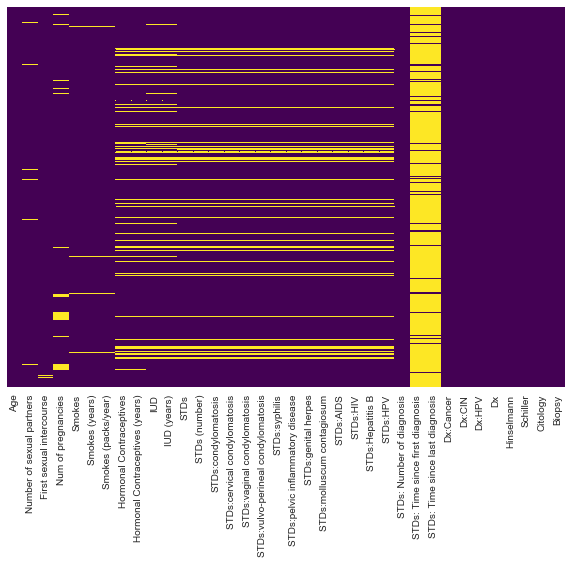

In [556]:
plt.figure(figsize = (10,7))
sns.set()
_ = sns.heatmap(df.isnull(),yticklabels=False, cbar = False, cmap = 'viridis')

**As seen on the heatmap above, two columns have almost consist of missing values. Most of the other columns have missing values as well. In order to find out the percentage of missing values in each column, we will use the function below.**

In [557]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [558]:
missing_values_table(df)

Your selected dataframe has 36 columns.
There are 26 columns that have missing values.


,Missing Values,% of Total Values
STDs: Time since last diagnosis,787,91.7
STDs: Time since first diagnosis,787,91.7
IUD,117,13.6
IUD (years),117,13.6
Hormonal Contraceptives,108,12.6
Hormonal Contraceptives (years),108,12.6
STDs:vulvo-perineal condylomatosis,105,12.2
STDs:HPV,105,12.2
STDs:Hepatitis B,105,12.2
STDs:HIV,105,12.2


**26 out of 36 columns have missing values but since 'STDs: Time since first diagnosis' and 'STDs: Time since last diagnosis' columns have % 91.7 missing values, we are going to drop off these columns.**

In [559]:
df.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis =1 , inplace = True)

**The rest columns have less than %15 missing values. For the numerical missing values, we will use imputing techniques to replace them. Since most of our columns have boolean type of variables we will implement pd.get_dummies() function to create dummy variables for all 0, 1 and NaN values. Thus we will not loose any data points.**

### Imputing the numeric columns

In [560]:
df['STDs (number)'].fillna(np.ceil(df['STDs (number)'].mean()), inplace=True)
df['IUD (years)'].fillna(np.ceil(df['IUD (years)'].mean()), inplace=True)
df['Hormonal Contraceptives (years)'].fillna(np.ceil(df['Hormonal Contraceptives (years)'].mean()), inplace=True)
df['Smokes (packs/year)'].fillna(np.ceil(df['Smokes (packs/year)'].mean()), inplace=True)
df['Smokes (years)'].fillna(np.ceil(df['Smokes (years)'].mean()), inplace=True)
df['Number of sexual partners'].fillna(np.ceil(df['Number of sexual partners'].mean()), inplace=True)
df['Num of pregnancies'].fillna(np.ceil(df['Num of pregnancies'].mean()), inplace=True)
df['First sexual intercourse'].fillna(np.ceil(df['First sexual intercourse'].mean()), inplace=True)

**To get the dummy variables we need to convert the type of the data to category first**

In [561]:
for col in ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs','STDs:cervical condylomatosis','STDs:condylomatosis', 'STDs:vaginal condylomatosis',
'STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:Hepatitis B','STDs:pelvic inflammatory disease', 'STDs:genital herpes',
'STDs:molluscum contagiosum','STDs:AIDS', 'STDs:HIV','STDs:HPV']:
    df[col] = df[col].astype('category')

### pd.get_dummies() function for categorical missing values

In [562]:
df2 = pd.get_dummies(df[['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs','STDs:cervical condylomatosis','STDs:condylomatosis', 'STDs:vaginal condylomatosis',
                         'STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:Hepatitis B','STDs:pelvic inflammatory disease', 'STDs:genital herpes',
                         'STDs:molluscum contagiosum','STDs:AIDS', 'STDs:HIV','STDs:HPV']], dummy_na = True)
df2.head()

,Smokes_0.0,Smokes_1.0,Smokes_nan,Hormonal Contraceptives_0.0,Hormonal Contraceptives_1.0,Hormonal Contraceptives_nan,IUD_0.0,IUD_1.0,IUD_nan,STDs_0.0,...,STDs:molluscum contagiosum_1.0,STDs:molluscum contagiosum_nan,STDs:AIDS_0.0,STDs:AIDS_nan,STDs:HIV_0.0,STDs:HIV_1.0,STDs:HIV_nan,STDs:HPV_0.0,STDs:HPV_1.0,STDs:HPV_nan
0,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
1,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
2,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,0,1,0,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
4,1,0,0,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0


**Now we will concatenate our new data frame to main one**

In [563]:
df = pd.concat([df, df2], axis= 1)

In [564]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:molluscum contagiosum_1.0,STDs:molluscum contagiosum_nan,STDs:AIDS_0.0,STDs:AIDS_nan,STDs:HIV_0.0,STDs:HIV_1.0,STDs:HIV_nan,STDs:HPV_0.0,STDs:HPV_1.0,STDs:HPV_nan
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,1,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,1,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,1,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0,0,1,0,1,0,0,1,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0,0,1,0,1,0,0,1,0,0


**It is time to drop the root columns which has dummy ones**

In [565]:
df.drop(['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs','STDs:cervical condylomatosis','STDs:condylomatosis', 'STDs:vaginal condylomatosis',
                         'STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:Hepatitis B','STDs:pelvic inflammatory disease', 'STDs:genital herpes',
                         'STDs:molluscum contagiosum','STDs:AIDS', 'STDs:HIV', 'STDs:HPV'], axis = 1, inplace = True)

In [566]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,...,STDs:molluscum contagiosum_1.0,STDs:molluscum contagiosum_nan,STDs:AIDS_0.0,STDs:AIDS_nan,STDs:HIV_0.0,STDs:HIV_1.0,STDs:HIV_nan,STDs:HPV_0.0,STDs:HPV_1.0,STDs:HPV_nan
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,1,0,0,1,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,1,0,0,1,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,1,0,0,1,0,0
3,52,5.0,16.0,4.0,37.0,37.0,3.0,0.0,0.0,0,...,0,0,1,0,1,0,0,1,0,0
4,46,3.0,21.0,4.0,0.0,0.0,15.0,0.0,0.0,0,...,0,0,1,0,1,0,0,1,0,0


**Now we can see there is no missing values in our data set. Now we have 64 columns and 858 data points**

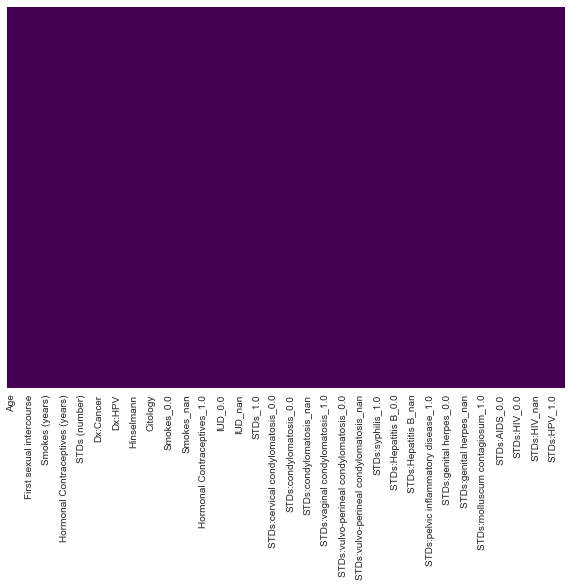

In [567]:
plt.figure(figsize = (10,7))
sns.set()
_ = sns.heatmap(df.isnull(),yticklabels=False, cbar = False, cmap = 'viridis')

**Data set consists of numeric data points solely.**

In [568]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 64 columns):
Age                                       858 non-null int64
Number of sexual partners                 858 non-null float64
First sexual intercourse                  858 non-null float64
Num of pregnancies                        858 non-null float64
Smokes (years)                            858 non-null float64
Smokes (packs/year)                       858 non-null float64
Hormonal Contraceptives (years)           858 non-null float64
IUD (years)                               858 non-null float64
STDs (number)                             858 non-null float64
STDs: Number of diagnosis                 858 non-null int64
Dx:Cancer                                 858 non-null int64
Dx:CIN                                    858 non-null int64
Dx:HPV                                    858 non-null int64
Dx                                        858 non-null int64
Hinselmann               

## To save it as a csv file.**

In [569]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis,...,STDs:molluscum contagiosum_1.0,STDs:molluscum contagiosum_nan,STDs:AIDS_0.0,STDs:AIDS_nan,STDs:HIV_0.0,STDs:HIV_1.0,STDs:HIV_nan,STDs:HPV_0.0,STDs:HPV_1.0,STDs:HPV_nan
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,1,0,0,1,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,1,0,0,1,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,1,0,0,1,0,0
3,52,5.0,16.0,4.0,37.0,37.0,3.0,0.0,0.0,0,...,0,0,1,0,1,0,0,1,0,0
4,46,3.0,21.0,4.0,0.0,0.0,15.0,0.0,0.0,0,...,0,0,1,0,1,0,0,1,0,0


In [570]:
df.to_csv('Cervical_Cancer_Risk_Cleaned.csv')